In [1]:
# -*- coding: utf-8 -*-
'''
Computa els canvis registrats en el taulell de joc i ho passa al Mòdul Control.
'''
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time

In [2]:
def mostrarResultat(im,estatPartida,debug=False):
    for d in estatPartida:
        if debug:
            print(d,':',estatPartida[d])
        punts = estatPartida[d][1]
        x,y,w,h = estatPartida[d][0]
        orientacio = estatPartida[d][2]
        margin=20
        if orientacio == 0:
            x1=x-margin
            y1=y+int(h/2)
            x2=x+w
            y2=y+int(h/2)
            im =cv.putText(im,str(punts[0]),(x1,y1), cv.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2,cv.LINE_AA)
            im =cv.putText(im,str(punts[1]),(x2,y2), cv.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2,cv.LINE_AA)
        else:
            x1=x+int(w/2)
            y1=y
            x2=x+int(w/2)
            y2=y+h+margin
            im =cv.putText(im,str(punts[0]),(x1,y1), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),2,cv.LINE_AA)
            im =cv.putText(im,str(punts[1]),(x2,y2), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),2,cv.LINE_AA)            
        if debug:
            im =cv.putText(im,str(d),(x+int(w/2),(y+int(h/2))), cv.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),2,cv.LINE_AA)
    im.astype('uint8')
    return im

In [3]:
def processarFrame(frame, debug=False):
    start = time.time()
    im = frame.copy()
    # Aplicar Threshold per obtenir imatge binaria
    ret,threshold = cv.threshold(frame,127,255,cv.THRESH_BINARY) 
    # Aplicar filtre Gaussia per eliminar el soroll
    threshold = cv.GaussianBlur(threshold, (5,5), 0) 
    
    # Creem imatge 2D per trobar-hi contorns 
    contorns = threshold[:,:,0]
    if debug :
        plt.figure()
        plt.imshow(contorns,'gray')
    # Trobem els contorns presents en la imatge (principalment les fitxes i els punts)
    contours, hierarchy = cv.findContours(contorns,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # contours -> Llista de contorns (llista de llistes de punts que formen cada contorn)
    # hierarchy ->Llista de relacions entre contorns
    # estructura de hierarchy -> [Next, Previous, First_Child, Parent]
    # el valor de cada camp referencia a un altre contorn
    # si no fa referencia a cap contorn, valor = -1 p.e si un contorn no te cap contorn dins : First_Child = -1
    
    # Creem un diccionari per desar les fitxes amb les seves dades
    dictContorns = {}
    # dictContorns = {idContorn: [cos,punts,orientacio]}
    #                 cos: [x, y, width, height]
    #                 punts: [puntsA, puntsB]
    #                 orientacio: 0 Horitzontal; 1 Vertical
    
    # Per cada contorn c
    for i,c in enumerate(contours):
        pare = hierarchy[0][i,3]
        # Si el contorn actual esta dins d'algun altre (es un punt)
        if pare != -1:
            # registrem les dades de la fitxa a la que pertany el punt a la variable cos
            # cos -> (x,y,width,height)
            cos = cv.boundingRect(contours[pare])
            # registrem les dades del punt actual
            x,y,w,h = cv.boundingRect(contours[i])
            punts=[0,0]
            orientacio=0
            #Comprovem l'orientacio de la fitxa i assignem el punt a un dels costats
            if cos[2] > cos[3]:
                # Horitzontal
                orientacio=0
                if x < cos[0]+int(cos[2]/2):
                    punts=[1,0] # Esquerra
                else:
                    punts=[0,1] # Dreta
            elif cos[2] < cos[3]:
                # Vertical
                orientacio=1
                if y < cos[1]+int(cos[3]/2):
                    punts=[1,0] # Superior
                else:
                    punts=[0,1] # Inferior
            else:
                print('Error!')
                pass          
            
            # Si la fitxa no existeix en el diccionari, la afegim amb totes les dades que hem recollit
            if not str(pare) in dictContorns:
                dictContorns[str(pare)]=[cos,punts,orientacio]
            # Si la fitxa si existeix, modifiquem el camp punts afegint el punt trobat al canto corresponent
            else:               
                dictContorns[str(pare)][1][0]+=punts[0]
                dictContorns[str(pare)][1][1]+=punts[1]
    if debug:
        print('Temps execució: %.3f segons' %(time.time()-start))
    return dictContorns

abans
despres
contorns: 21
[[[11 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 9  5  7  0]
  [ 8 -1 -1  6]
  [-1  7 -1  6]
  [10  6 -1  0]
  [-1  9 -1  0]
  [-1  0 12 -1]
  [13 -1 -1 11]
  [14 12 -1 11]
  [15 13 -1 11]
  [16 14 -1 11]
  [17 15 -1 11]
  [18 16 -1 11]
  [-1 17 19 11]
  [20 -1 -1 18]
  [-1 19 -1 18]]]
Temps execució: 0.290 segons


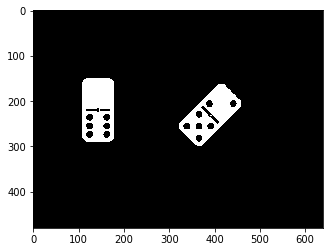

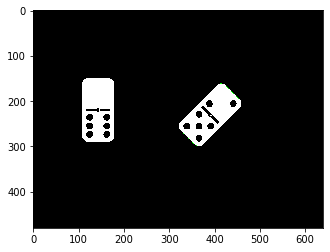

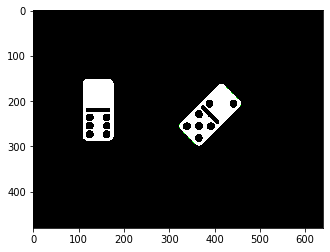

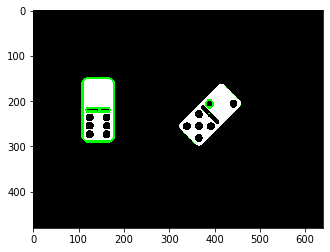

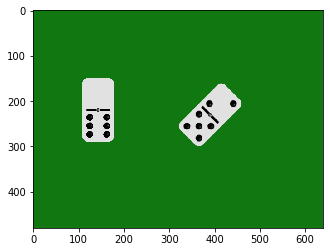

In [42]:

        

def processarFrame2(frame, debug=False):
    start = time.time()
    im = frame.copy()
    # Aplicar Threshold per obtenir imatge binaria
    ret,threshold = cv.threshold(frame,127,255,cv.THRESH_BINARY) 
    # Aplicar filtre Gaussia per eliminar el soroll
    #threshold = cv.GaussianBlur(threshold, (5,5), 0) 
    
    # Creem imatge 2D per trobar-hi contorns 
    contorns = threshold[:,:,0]
    if debug :
        plt.figure()
        plt.imshow(contorns,'gray')
    # Trobem els contorns presents en la imatge (principalment les fitxes i els punts)
    contours, hierarchy = cv.findContours(contorns,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # contours -> Llista de contorns (llista de llistes de punts que formen cada contorn)
    # hierarchy ->Llista de relacions entre contorns
    # estructura de hierarchy -> [Next, Previous, First_Child, Parent]
    # el valor de cada camp referencia a un altre contorn
    # si no fa referencia a cap contorn, valor = -1 p.e si un contorn no te cap contorn dins : First_Child = -1
    
    # Creem un diccionari per desar les fitxes amb les seves dades
    dictContorns = {}
    # dictContorns = {idContorn: [cos,punts,orientacio]}
    #                 cos: [x, y, width, height]
    #                 punts: [puntsA, puntsB]
    #                 orientacio: 0 Horitzontal; 1 Vertical
    print('abans')
    plt.figure()
    plt.imshow(threshold,'gray')
    kernel = np.ones((3,3), np.uint8)
    threshold = cv.erode(threshold,kernel,iterations=1)
    print('despres')
    plt.figure()
    plt.imshow(threshold,'gray')
    
    # Per cada contorn c
    out = threshold.copy()
    print('contorns: {}'.format(len(hierarchy[0])))
    for i,c in enumerate(contours):
        if(hierarchy[0][i,0]==-1):
            cnt = contours[i]
            cv.drawContours(out, [cnt], 0, (0,255,0), 3)
    
    print(hierarchy)
    plt.figure()
    plt.imshow(out,'gray')
    
    if debug:
        print('Temps execució: %.3f segons' %(time.time()-start))
    return dictContorns

if __name__ == '__main__':
    frame = cv.imread('src/test1fitxa.jpg')    
    estatPartida = processarFrame2(frame,True)
    im=frame.copy()
    debug = True;
    if debug:
        plt.figure()
        plt.imshow(mostrarResultat(im,estatPartida))

nContorns:40
box:[[366 305]
 [316 255]
 [415 156]
 [465 206]]
[array([[366, 305],
       [316, 255],
       [415, 156],
       [465, 206]], dtype=int64)]
box:[[108 288]
 [108 148]
 [178 149]
 [178 288]]
[array([[108, 288],
       [108, 148],
       [178, 149],
       [178, 288]], dtype=int64)]
id: 0 value: [array([[[413, 161]],

       [[412, 162]],

       [[410, 162]],

       [[409, 163]],

       [[408, 163]],

       [[323, 248]],

       [[323, 249]],

       [[322, 250]],

       [[322, 260]],

       [[323, 261]],

       [[323, 262]],

       [[359, 298]],

       [[361, 298]],

       [[362, 299]],

       [[369, 299]],

       [[370, 298]],

       [[372, 298]],

       [[373, 297]],

       [[374, 297]],

       [[458, 213]],

       [[458, 211]],

       [[459, 210]],

       [[459, 201]],

       [[458, 200]],

       [[458, 199]],

       [[422, 163]],

       [[421, 163]],

       [[420, 162]],

       [[418, 162]],

       [[417, 161]]], dtype=int32)]
id: 21 value: [ar

True

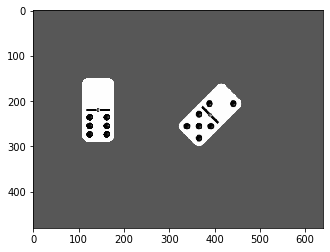

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def getBody(contour):
    #[x, y, width, height]
    rect = cv.boundingRect(contour)
    print('rect: \n{}'.format(rect))
    x,y,width,height = rect
    angle=0
    cos = [x,y,width,height,angle]
    return cos



frame = cv.imread('src/test1fitxa.jpg')  
gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
ret,thr = cv.threshold(gray,127,255,cv.THRESH_TOZERO)


edges = cv.Canny(thr,100,200)


out = frame.copy()
out[:,:,0]=gray[:,:]
out[:,:,1]=gray[:,:]
out[:,:,2]=gray[:,:]
contours,hierarchy = cv.findContours(edges,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

print('nContorns:{}'.format(len(hierarchy[0])))
# estructura de hierarchy -> [Next, Previous, First_Child, Parent]
sonsOfAnarchy = {}
for i,c in enumerate(contours):
    parent = hierarchy[0][i,3]
    if parent == -1:
        sonsOfAnarchy[str(i)]=[contours[i]]

        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        
        print('box:{}'.format(box))
        
        cv.drawContours(out,[box],0,(0,255,0),2)
        print([box])
        #cv.drawContours(out,[contours[i]], 0, (0,0,255), 2)
        
for s in sonsOfAnarchy:
    print('id: {} value: {}'.format(s,sonsOfAnarchy[s]))
    
       
plt.figure()
plt.imshow(gray,'gray')


cv.imwrite('edgesOut.png',out)

[[[11 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 9  5  7  0]
  [ 8 -1 -1  6]
  [-1  7 -1  6]
  [10  6 -1  0]
  [-1  9 -1  0]
  [-1  0 12 -1]
  [13 -1 -1 11]
  [14 12 -1 11]
  [15 13 -1 11]
  [16 14 -1 11]
  [17 15 -1 11]
  [18 16 -1 11]
  [-1 17 19 11]
  [20 -1 -1 18]
  [-1 19 -1 18]]]
Temps execució: 0.092 segons


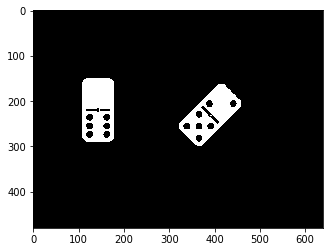

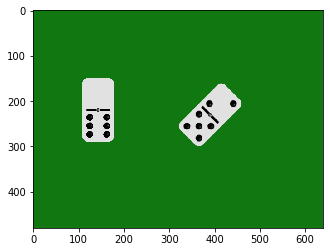

In [32]:
if __name__ == '__main__':
    frame = cv.imread('src/test1fitxa.jpg')    
    estatPartida = processarFrame2(frame,True)
    im=frame.copy()
    debug = True;
    if debug:
        plt.figure()
        plt.imshow(mostrarResultat(im,estatPartida))